In [1]:
import nltk
import pandas as pd

C:\Users\Abhi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Abhi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Dataset preparation

### dataset txt file

In [22]:
reviews_txt= [line.rstrip() for line in open('amazon_cells_labelled.txt')]
for line_no,line in enumerate(reviews_txt):
    print(line_no,line)
    print('\n')

0 So there is no way for me to plug it in here in the US unless I go by a converter.	0


1 Good case, Excellent value.	1


2 Great for the jawbone.	1


3 Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0


4 The mic is great.	1


5 I have to jiggle the plug to get it to line up right to get decent volume.	0


6 If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0


7 If you are Razr owner...you must have this!	1


8 Needless to say, I wasted my money.	0


9 What a waste of money and time!.	0


10 And the sound quality is great.	1


11 He was very impressed when going from the original battery to the extended battery.	1


12 If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0


13 Very good quality though	1


14 The design is very odd, as the ear "clip" is not very comfortable at all.	0


15 Highly recommend for any one who has a b

689 Works well.	1


690 The nokia CA-42 USB cable did not work with my phone.	0


691 Clear crisp sound.	1


692 I have to use the smallest earpieces provided, but it stays on pretty well.	1


693 The biggest complaint I have is, the battery drains superfast.	0


694 The design might be ergonomic in theory but I could not stand having these in my ear.	0


695 Do NOT buy if you want to use the holster.	0


696 The phone can also take great pictures and even video clips.	1


697 It doesn't make you look cool.	0


698 Because both ears are occupied, background is not distracting at all.	1


699 Comfortable fit - you need your headset to be comfortable for at least an hour at a time, if not for an entire day.	1


700 Also, the phone doesn't seem to accept anything except CBR mp3s, preferably ripped by Windows Media Player.	0


701 You can't beat the price on these.	1


702 * Comes with a strong light that you can use to light up your camera shots, and even flash SOS signals (seriously!	1



In [19]:
reviews_txt[4]

'The mic is great.\t1'

### Read Dataset
#### CSV file does not open properly. Using txt file.

In [2]:
reviews = pd.read_csv('amazon_cells_labelled.txt',sep='\t',names=['review','sentiment'])
reviews.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
reviews.tail()

,review,sentiment
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0


In [ ]:
# reviews.rename(columns={'review':'review','sentiment':'label'},inplace=True)

In [4]:
len(reviews)

1000

In [5]:
reviews.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
reviews['review'].describe()

count             1000
unique             990
top       Great phone.
freq                 2
Name: review, dtype: object

In [7]:
reviews.groupby('sentiment').describe()

review                                              
           count unique                               top freq
sentiment                                                     
0            500    497                     Does not fit.    2
1            500    493  Excellent product for the price.    2

### Check if any NaN values exist. 
`No`

In [8]:
# Check if any missing or NaN values
reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

### Create new column 'length'. Contains length of review

In [22]:
reviews['length'] = reviews['review'].apply(len)
reviews.head()

,review,sentiment,length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


### Creating histogram plot of `length` column to see if there is any trend with length of the review and sentiment

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5821F8CF8>,
      dtype=object)

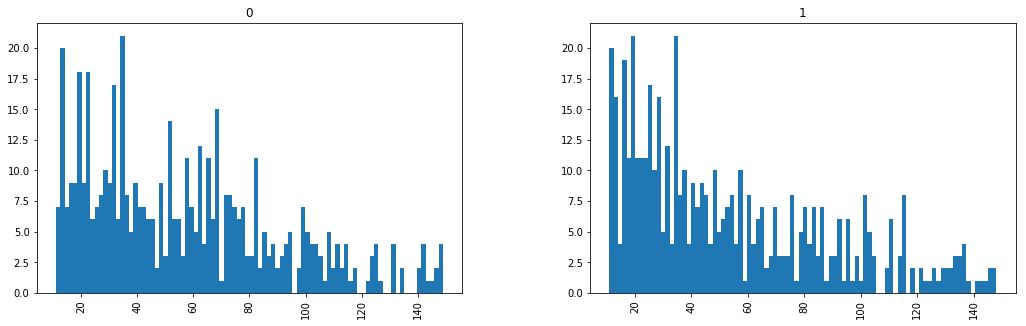

In [31]:
reviews.hist(column='length',by='sentiment',bins=90,figsize=(17,5))

In [3]:
reviews.to_csv('Collected_data.csv',index=False)

Looks like length of review does not show any trend in the dataset. Drop `length` column.

In [4]:
reviews = pd.read_csv('Collected_data.csv')

In [5]:
reviews.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [34]:
# inplace is set as False. Not really dropping "length" column. 
# Just won't use it.
reviews.drop('length',axis=1) 

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [6]:
# Still got the "length" column.
reviews.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## Data Preprocessing `not removing` stopwords
No null values exist.

-remove punctuation

-Lowercase all characters

-tokenize all strings

-Will try modelling two ways=> First: without removing stop words.| Second: removing stop words.

In [7]:
import string

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# Testing how punctuation removal works
mystr = "This is really bad! I wanted to eat Pizza. Is there any?"
mystr = mystr.lower()
print("Lowercase: " + mystr+"\n")

mystr = [ch for ch in mystr if ch not in string.punctuation]

print(''.join(mystr))

Lowercase: this is really bad! i wanted to eat pizza. is there any?

this is really bad i wanted to eat pizza is there any


String Processing function that will process the review strings in the DataFrame

In [10]:
def string_processing(review_string):
    '''
    Sets all characters to lowercase 
    Removes punctuation from the review_string. Processed string will be a list
    of characters. Used ''.join() method  and then will return the string.
    '''
#     review_string = str(TextBlob(review_string).correct())
    review_string = review_string.lower() # all characters in string to lowercase.
    review_string = [ch for ch in review_string if ch not in string.punctuation] # removoed punctuation marks
    
    review_string = ''.join(review_string)
#     review_string = review_string.split()
    return review_string
    
#     review_string = review_string.split() # words stored in list    

Using punctuation_removal to lowercase the review string and remove punctuation. Using DataFrame.apply() method

In [11]:
# Testing whether punctuation_remove() function works or not.
mystr = "This is really bad! I wanted to eat pizza. Is there any?"
print(string_processing(mystr))

this is really bad i wanted to eat pizza is there any


In [73]:
# reviews['review']= reviews['review'].apply(string_processing)

In [74]:
# reviews.head()

,review,sentiment,length
0,"[so, there, is, no, way, for, me, to, plug, it...",0,82
1,"[good, case, excellent, value]",1,27
2,"[great, for, the, jawbone]",1,22
3,"[tied, to, charger, for, conversations, lastin...",0,79
4,"[the, mic, is, great]",1,17


We get a list of tokens for each review.

In [12]:
reviews['review'][45]

'It has all the features I want'

### Saving tokenized data (contains stopwords) as csv file.

In [76]:
# reviews.to_csv("Tokenized_data_contains_stopwords.csv",index=False)

## Split data into train and test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y= reviews['sentiment'].values
train_reviews,test_reviews,train_sentiment,test_sentiment = train_test_split(reviews['review'],y,test_size=0.5,random_state=101)

In [36]:
train_reviews

array(['Great for using with your home stereo.',
       'The item received was Counterfeit.',
       'The reception is excellent!',
       'I highly recommend this modest priced cellular phone.',
       'I used to talk on it for 1 - 1 1/2 hours and the battery would be literally drained and dying.',
       "IT'S REALLY EASY.",
       'Bought mainly for the charger, which broke soon after purchasing.',
       'Absolutel junk.', 'Everything about this product is wrong.First',
       'The delivery was on time.',
       "It's very attractive and appears to be of good quality.",
       "Gets a signal when other Verizon phones won't.",
       'This pair of headphones is the worst that I have ever had sound-wise.',
       'A Disappointment.', 'It definitely was not as good as my S11.',
       "It plays louder than any other speaker of this size; the price is so low that most would think the quality is lacking, however, it's not.",
       'Best of all is the rotating feature, very helpful.',
 

In [37]:
test_reviews

array(["No shifting, no bubbling, no peeling, not even a scratch, NOTHING!I couldn't be more happier with my new one for the Droid.",
       'Customer service was terrible.',
       'I purcashed this for the car charger and it does not work.',
       "I don't like this Nokia either.", 'Not impressed.',
       'This is infuriating.', 'Excellent wallet type phone case.',
       'The biggest complaint I have is, the battery drains superfast.',
       'Great price, too!',
       "It's so stupid to have to keep buying new chargers, car chargers, cradles, headphones and car kits every time a new phone comes out.",
       'Awkward to use and unreliable.',
       ':-)Oh, the charger seems to work fine.',
       'It dit not work most of the time with my Nokia 5320.',
       'Was not happy.',
       'The real killer is the volume, and of course it breaking.',
       'I love this device.', 'Could not get strong enough signal.',
       'Battery life still not long enough in Motorola Razor V3i.',
 

In [38]:
train_sentiment.shape

(500,)

In [39]:
test_sentiment.shape

(500,)

#### Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
Vectorizer = CountVectorizer().fit(test_reviews)

In [17]:
len(Vectorizer.vocabulary_)

1227

In [18]:
Train_set= Vectorizer.transform(train_reviews)
Test_set = Vectorizer.transform(test_reviews)

In [19]:
Train_set

<500x1227 sparse matrix of type '<class 'numpy.int64'>'
	with 3829 stored elements in Compressed Sparse Row format>

In [20]:
Test_set

<500x1227 sparse matrix of type '<class 'numpy.int64'>'
	with 4559 stored elements in Compressed Sparse Row format>

In [21]:
# Testing our bag of words vectorizer
print(reviews['review'][945])
re16 = Vectorizer.transform([reviews['review'][945]])
print(re16)

It is easy to turn on and off when you are in the car and the volume controls are quite accessable.
  (0, 29)	1
  (0, 59)	2
  (0, 75)	2
  (0, 174)	1
  (0, 246)	1
  (0, 359)	1
  (0, 554)	1
  (0, 578)	1
  (0, 581)	1
  (0, 739)	1
  (0, 744)	1
  (0, 858)	1
  (0, 1061)	2
  (0, 1091)	1
  (0, 1113)	1
  (0, 1156)	1
  (0, 1185)	1
  (0, 1224)	1


In [22]:
re16.shape

(1, 1227)

In [23]:
print(Vectorizer.get_feature_names()[59])
print(Vectorizer.get_feature_names()[75])
print(Vectorizer.get_feature_names()[1061])

and
are
the


### TF-IDF Transformer

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit(Train_set)

# Training Model

## Logistic Regression

Train the model using train dataset:

`Train_set` and `train_sentiment`

In [25]:
from sklearn.linear_model import LogisticRegression
Logisic_Regression_model = LogisticRegression().fit(Train_set,train_sentiment)

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Save the model as a file using `pickle`:

In [26]:
import pickle

In [27]:
LR_file = open("Logistic_Reg_model.sav","wb")

In [28]:
pickle.dump(Logisic_Regression_model,LR_file)

In [30]:
LR_file.close()

#### Check accuracy:

In [83]:
Logisic_Regression_Accuracy = Logisic_Regression_model.score(Test_set,test_sentiment)
print("Accuracy of Logistic Regression: ",Logisic_Regression_Accuracy)

Accuracy of Logistic Regression:  0.792


#### Model evaluation by confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

Confusion matrix:

In [33]:
confusion_matrix(test_sentiment,Logisic_Regression_model.predict(Test_set))

array([[205,  64],
       [ 40, 191]], dtype=int64)

## Naive Bayes Classifier

In [34]:
from sklearn.naive_bayes import MultinomialNB

Train the model using X: `Train_set` and y:`train_sentiment`

In [35]:
multinomial_NB_model = MultinomialNB().fit(Train_set,train_sentiment)

Check accuracy of MultinomialNB

In [36]:
print("Accuracy of MultinomialNB: ", multinomial_NB_model.score(Test_set,test_sentiment))

Accuracy of MultinomialNB:  0.776


Confusion Matrix:

In [37]:
confusion_matrix(test_sentiment,multinomial_NB_model.predict(Test_set))

array([[187,  82],
       [ 30, 201]], dtype=int64)

In [38]:
NB_file = open("MutlinomailNB_model.sav","wb")
pickle.dump(multinomial_NB_model,NB_file)
NB_file.close()